# Multiple Linear Regression

### Farklı reklam kanlalrında yapılan harcamaların satıuşlar üzerine etkisi

In [3]:
# importlibraries
import pandas as pd

In [4]:
# load dataset

In [2]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 4821-D018

 Directory of C:\Users\emura\Documents\BTK_24_ML\DAY3

02.03.2024  16:34    <DIR>          .
02.03.2024  10:28    <DIR>          ..
02.03.2024  16:26    <DIR>          .ipynb_checkpoints
02.03.2024  16:22            52.416 165_seslendirme.mp3
02.03.2024  16:19           166.656 649_seslendirme.mp3
02.03.2024  16:24            54.624 753_seslendirme.mp3
02.03.2024  16:12           166.656 791_seslendirme.mp3
02.03.2024  16:24            49.056 804_seslendirme.mp3
02.03.2024  16:21            52.992 82_seslendirme.mp3
19.02.2024  21:11             4.063 advertising.csv
02.03.2024  15:07           184.712 finance.ipynb
19.02.2024  21:11            11.001 info.docx
02.03.2024  16:24               153 konusma.txt
02.03.2024  16:34             2.564 Regresyon Analizi.ipynb
02.03.2024  16:24            14.753 seslendirme.ipynb
02.03.2024  16:08           166.656 seslendirme.mp3
02.03.2024  15:54            30.720 seslendirme_in

In [5]:
df=pd.read_csv('advertising.csv')

In [6]:
# data preprocessing
#EDA

In [7]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [9]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


<Axes: >

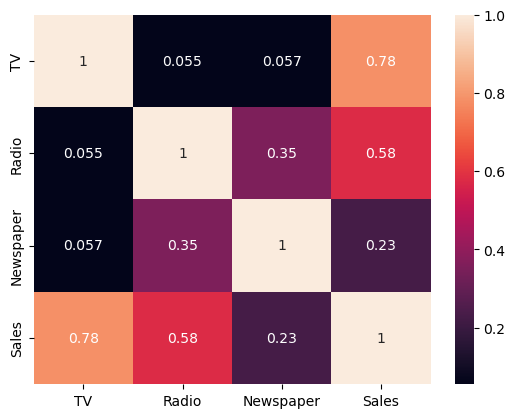

In [10]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
from sklearn.linear_model import LinearRegression

In [16]:
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
from sklearn.preprocessing import StandardScaler as Scaler

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [22]:
y=df['Sales']
X=df[['TV','Radio','Newspaper']]

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20, random_state=42)

### Building Model

In [25]:
mlr=LinearRegression()

In [26]:
#Train Model

In [27]:
mlr.fit(X_train,y_train)

LinearRegression()

In [28]:
#predict # tahminleri yap ve  kıyasla

In [29]:
y_pred=mlr.predict(X_test)

In [30]:
y_pred

array([16.4080242 , 20.88988209, 21.55384318, 10.60850256, 22.11237326,
       13.10559172, 21.05719192,  7.46101034, 13.60634581, 15.15506967,
        9.04831992,  6.65328312, 14.34554487,  8.90349333,  9.68959028,
       12.16494386,  8.73628397, 16.26507258, 10.27759582, 18.83109103,
       19.56036653, 13.25103464, 12.33620695, 21.30695132,  7.82740305,
        5.80957448, 20.75753231, 11.98138077,  9.18349576,  8.5066991 ,
       12.46646769, 10.00337695, 21.3876709 , 12.24966368, 18.26661538,
       20.13766267, 14.05514005, 20.85411186, 11.0174441 ,  4.56899622])

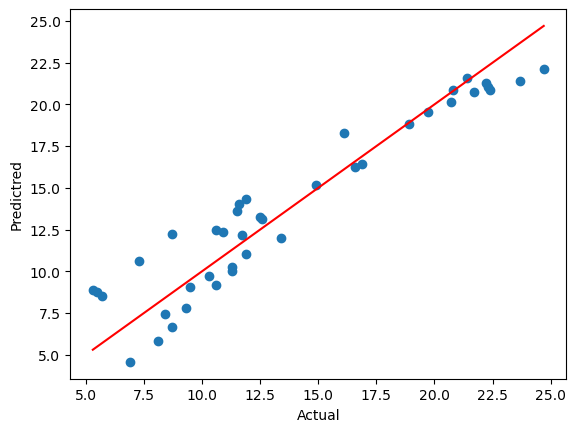

In [32]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predictred')
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)], color='red');

### Evulation Değerlendirme

In [33]:
r2_score(y_test,y_pred)

0.899438024100912

In [36]:
mean_squared_error(y_test,y_pred)**0.5

1.7815996615334502

In [35]:
df.describe()


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [37]:
mlr.coef_ #regresyon katsayıları

array([0.04472952, 0.18919505, 0.00276111])

In [38]:
mlr.intercept_

2.9790673381226274